This notebook builds a figure of adrenergic receptors expression under different treatment conditions.

In [1]:
import numpy, pandas, seaborn, scipy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [3]:
tpm_file = '/home/adrian/projects/vigur/results/sequencing/tpm/DESeq2_TPM_values.tsv'
metadata_file = '/home/adrian/projects/vigur/data/sequencing/metadata/metadata.tsv'

In [4]:
receptors = {}
receptors['ADRA1A'] = 'ENSG00000120907'
receptors['ADRA1B'] = 'ENSG00000170214'
receptors['ADRA1D'] = 'ENSG00000171873'

receptors['ADRA2A'] = 'ENSG00000150594'
receptors['ADRA2B'] = 'ENSG00000274286'
receptors['ADRA2C'] = 'ENSG00000184160'

receptors['ADRB1'] = 'ENSG00000043591'
receptors['ADRB2'] = 'ENSG00000169252'
receptors['ADRB3'] = 'ENSG00000188778'

In [5]:
runs = [72, 73]
experiments = [1, 2, 3]
timepoints = ['four', 'zero', 'twentyfour']
treatments = ['zero', 'five_epi', 'five_nor', 'mix', 'TNFa']
replicates = [1, 2]

# read information

## read data

In [6]:
expression = pandas.read_csv(tpm_file, sep='\t', index_col=0)
expression = numpy.log2(expression + 1)
print(expression.shape)
expression.head()

(40320, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,5.125704,5.245112,5.141625,5.132029,5.341244,5.185370,5.262366,5.258180,5.505003,5.230589,...,5.317527,5.151366,5.222709,5.223352,5.196216,5.334655,5.244016,5.366981,5.366095,5.331987
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.098022,0.000000,0.060261,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,5.869861,5.939778,6.159248,6.274670,6.374286,6.351603,6.249864,6.258305,6.437065,6.279592,...,5.652877,6.243191,6.221524,6.490874,6.420431,6.314824,6.297232,6.319421,6.241241,5.855359
ENSG00000000457,2.365179,2.229233,2.604828,2.776332,2.588195,2.584697,2.571294,2.756873,2.764985,2.584177,...,2.248264,2.507611,2.435237,2.401491,2.637234,2.345200,2.413395,2.469503,2.437704,2.261023
ENSG00000000460,3.667877,3.612595,3.538937,3.487309,3.487741,3.529405,3.407171,3.285497,3.355322,3.286811,...,2.519054,2.384736,2.136631,2.238642,2.129327,2.234427,2.302659,2.210247,2.166903,2.749895


## read metadata

In [7]:
metadata = pandas.read_csv(metadata_file, sep='\t', index_col=1)
metadata.head()

,run,experiment,time,treatment,replicate
sampleID,,,,,
072_69,72,1,zero,zero,1
072_70,72,1,zero,zero,2
072_71,72,1,four,zero,1
072_72,72,1,four,zero,2
072_73,72,1,four,five_epi,1


# select genes for plotting

In [8]:
ensembl_IDs = [receptors[element] for element in receptors]
ensembl_IDs

gene_IDs = [element for element in receptors]
gene_IDs
print(gene_IDs)

expression_subset = expression.loc[ensembl_IDs, ]
print(expression_subset.shape)
expression_subset.head()

['ADRA1A', 'ADRA1B', 'ADRA1D', 'ADRA2A', 'ADRA2B', 'ADRA2C', 'ADRB1', 'ADRB2', 'ADRB3']
(9, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000120907,0.054182,0.080102,0.347226,0.049506,0.224797,0.454118,0.436433,0.388256,0.337898,0.146554,...,0.103216,0.224886,0.285109,0.419592,0.118548,0.130714,0.276924,0.047862,0.161935,0.256555
ENSG00000170214,2.595147,2.352131,3.258178,3.192158,3.935662,4.075711,3.989476,3.865788,4.103368,4.000090,...,2.442489,3.395100,3.379233,4.223887,4.171608,3.991617,4.003092,3.854751,3.855025,2.196653
ENSG00000171873,0.917138,0.805272,2.284254,2.259085,1.949371,1.996806,2.058431,2.078621,2.005965,1.965695,...,0.437543,3.027152,2.992395,1.602251,1.487823,1.254139,1.309265,1.013082,1.190475,0.723769
ENSG00000150594,0.007970,0.004677,0.058329,0.052794,0.047595,0.065793,0.062969,0.129965,0.099852,0.041670,...,0.000000,0.041396,0.069533,0.058207,0.088499,0.176545,0.221543,0.248848,0.247698,0.000000
ENSG00000274286,0.000000,0.000000,0.000000,0.000000,0.005020,0.060248,0.000000,0.009965,0.010798,0.016206,...,0.000000,0.004274,0.000000,0.004087,0.031156,0.102296,0.084413,0.079716,0.078671,0.000000


In [9]:
reverse_names = {}
for i in range(len(ensembl_IDs)):
    reverse_names[ensembl_IDs[i]] = gene_IDs[i]
print(reverse_names)

expression_subset.rename(reverse_names, axis='index', inplace=True)
expression_subset.head()

{'ENSG00000120907': 'ADRA1A', 'ENSG00000170214': 'ADRA1B', 'ENSG00000171873': 'ADRA1D', 'ENSG00000150594': 'ADRA2A', 'ENSG00000274286': 'ADRA2B', 'ENSG00000184160': 'ADRA2C', 'ENSG00000043591': 'ADRB1', 'ENSG00000169252': 'ADRB2', 'ENSG00000188778': 'ADRB3'}


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ADRA1A,0.054182,0.080102,0.347226,0.049506,0.224797,0.454118,0.436433,0.388256,0.337898,0.146554,...,0.103216,0.224886,0.285109,0.419592,0.118548,0.130714,0.276924,0.047862,0.161935,0.256555
ADRA1B,2.595147,2.352131,3.258178,3.192158,3.935662,4.075711,3.989476,3.865788,4.103368,4.000090,...,2.442489,3.395100,3.379233,4.223887,4.171608,3.991617,4.003092,3.854751,3.855025,2.196653
ADRA1D,0.917138,0.805272,2.284254,2.259085,1.949371,1.996806,2.058431,2.078621,2.005965,1.965695,...,0.437543,3.027152,2.992395,1.602251,1.487823,1.254139,1.309265,1.013082,1.190475,0.723769
ADRA2A,0.007970,0.004677,0.058329,0.052794,0.047595,0.065793,0.062969,0.129965,0.099852,0.041670,...,0.000000,0.041396,0.069533,0.058207,0.088499,0.176545,0.221543,0.248848,0.247698,0.000000
ADRA2B,0.000000,0.000000,0.000000,0.000000,0.005020,0.060248,0.000000,0.009965,0.010798,0.016206,...,0.000000,0.004274,0.000000,0.004087,0.031156,0.102296,0.084413,0.079716,0.078671,0.000000


# average samples appropriately

In [10]:
pdf = pandas.DataFrame()
for treatment in treatments:
    for timepoint in timepoints:
        for run in runs:
            for experiment in experiments:
                print(treatment, timepoint, run, experiment)
                
                rules =  (metadata['treatment'] == treatment) \
                & (metadata['time'] == timepoint) \
                & (metadata['run'] == run) \
                & (metadata['experiment'] == experiment)
                
                subset = metadata[rules]
                if subset.shape[0] > 1:
                    print('\t', subset.shape)
                    label = 'T{}_t{}_r{}_b{}'.format(treatment, timepoint, run, experiment)
                    selected_samples = subset.index
                    new_column = expression_subset.loc[:, selected_samples].median(axis=1)
                    pdf[label] = new_column

pdf.head()

zero four 72 1
	 (2, 5)
zero four 72 2
	 (2, 5)
zero four 72 3
	 (2, 5)
zero four 73 1
	 (2, 5)
zero four 73 2
	 (2, 5)
zero four 73 3
	 (2, 5)
zero zero 72 1
	 (2, 5)
zero zero 72 2
	 (2, 5)
zero zero 72 3
	 (2, 5)
zero zero 73 1
	 (2, 5)
zero zero 73 2
	 (2, 5)
zero zero 73 3
	 (2, 5)
zero twentyfour 72 1
	 (2, 5)
zero twentyfour 72 2
	 (2, 5)
zero twentyfour 72 3
	 (2, 5)
zero twentyfour 73 1
zero twentyfour 73 2
zero twentyfour 73 3
five_epi four 72 1
	 (2, 5)
five_epi four 72 2
	 (2, 5)
five_epi four 72 3
	 (2, 5)
five_epi four 73 1
five_epi four 73 2
five_epi four 73 3
five_epi zero 72 1
five_epi zero 72 2
five_epi zero 72 3
five_epi zero 73 1
five_epi zero 73 2
five_epi zero 73 3
five_epi twentyfour 72 1
	 (2, 5)
five_epi twentyfour 72 2
	 (2, 5)
five_epi twentyfour 72 3
	 (2, 5)
five_epi twentyfour 73 1
five_epi twentyfour 73 2
five_epi twentyfour 73 3
five_nor four 72 1
	 (2, 5)
five_nor four 72 2
	 (2, 5)
five_nor four 72 3
	 (2, 5)
five_nor four 73 1
five_nor four 73 2
five_

,Tzero_tfour_r72_b1,Tzero_tfour_r72_b2,Tzero_tfour_r72_b3,Tzero_tfour_r73_b1,Tzero_tfour_r73_b2,Tzero_tfour_r73_b3,Tzero_tzero_r72_b1,Tzero_tzero_r72_b2,Tzero_tzero_r72_b3,Tzero_tzero_r73_b1,...,Tmix_tfour_r73_b3,Tmix_ttwentyfour_r72_b1,Tmix_ttwentyfour_r72_b2,Tmix_ttwentyfour_r72_b3,TTNFa_tfour_r72_b1,TTNFa_tfour_r72_b2,TTNFa_tfour_r72_b3,TTNFa_ttwentyfour_r72_b1,TTNFa_ttwentyfour_r72_b2,TTNFa_ttwentyfour_r72_b3
ADRA1A,0.355851,0.198366,0.221757,0.221761,0.352351,0.176341,0.283606,0.067142,0.180657,0.443352,...,0.258969,0.254293,0.191840,0.116322,0.147062,0.148915,0.136671,0.077450,0.112591,0.182500
ADRA1B,3.400763,3.225168,3.090744,4.074958,3.801560,3.048197,2.812092,2.473639,2.615440,2.996677,...,4.291319,3.235312,2.714678,2.210511,2.829543,2.118479,2.078806,1.668306,1.566782,2.201162
ADRA1D,3.006877,2.271670,2.719743,2.969456,2.297323,1.748086,1.469843,0.861205,0.819123,2.228834,...,1.486355,1.862880,1.048696,0.492218,1.646426,0.842269,1.081221,0.576627,0.572086,0.677346
ADRA2A,0.090326,0.055561,0.073322,0.139500,0.063870,0.027428,0.001526,0.006323,0.015765,0.044195,...,0.121330,0.000000,0.007774,0.000000,0.025276,0.024747,0.041757,0.006213,0.000000,0.008417
ADRA2B,0.003760,0.000000,0.004162,0.022044,0.002044,0.002372,0.000000,0.000000,0.000000,0.005641,...,0.012466,0.000000,0.000000,0.000000,0.000000,0.000000,0.013650,0.000000,0.000000,0.000000


# visualize patterns

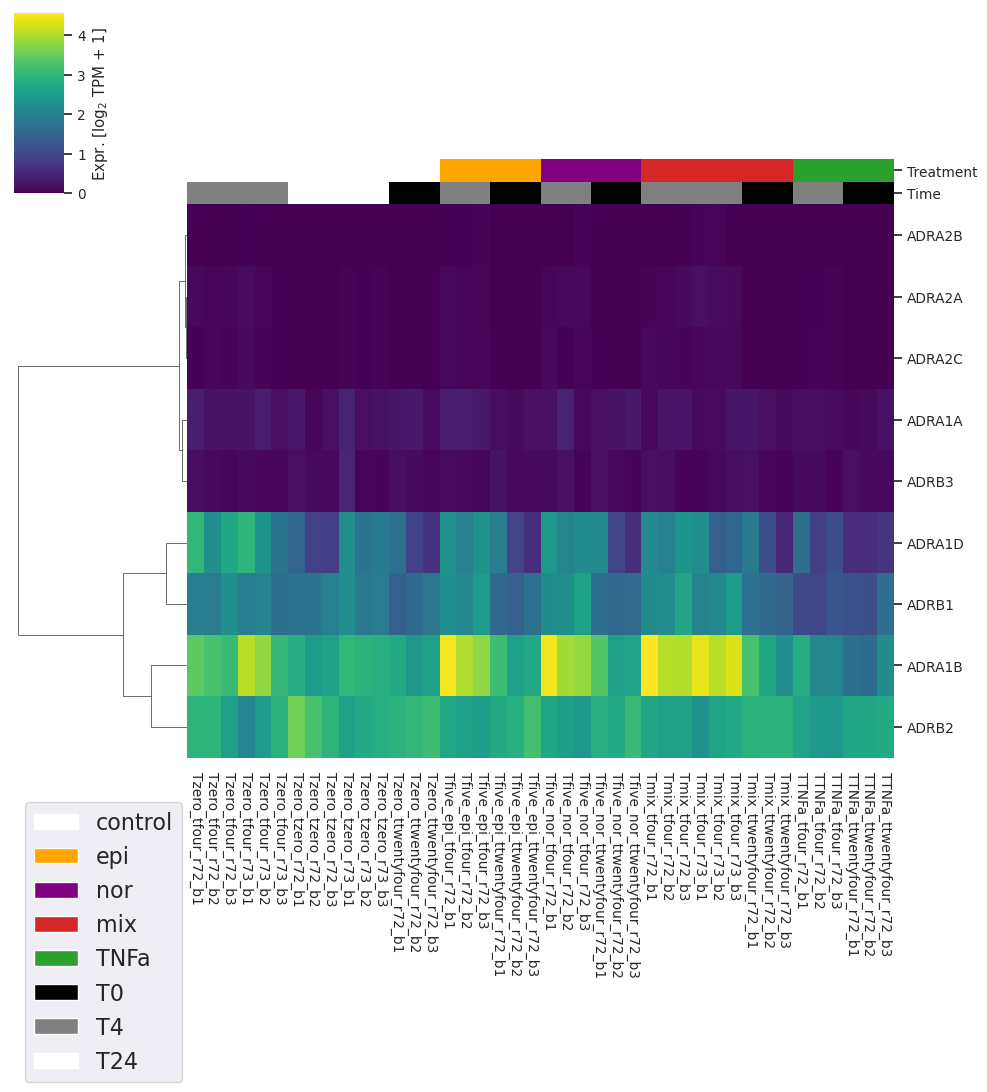

In [11]:
treatment_colors = []
for label in pdf.columns:
    if 'Tzero' in label:
        the_color = 'white'
    elif 'Tfive_epi' in label:
        the_color = 'orange'
    elif 'Tfive_nor' in label:
        the_color = 'purple'
    elif 'Tmix' in label:
        the_color = 'tab:red'
    elif 'TTNFa' in label:
        the_color = 'tab:green'
    else:
        print('error at treatment color assignment')
    treatment_colors.append(the_color)
    
time_colors = []
for label in pdf.columns:
    if 'tzero' in label:
        the_color = '1'
    elif 'tfour' in label:
        the_color = '0.5'
    elif 'ttwentyfour' in label:
        the_color = '0'
    else:
        print('error at time color assignment')
    time_colors.append(the_color)
    
color_df = pandas.DataFrame({'Treatment':treatment_colors, 'Time':time_colors}, index=pdf.columns)

seaborn.set(font_scale=0.9)
g = seaborn.clustermap(pdf, row_cluster=True, col_cluster=False, cmap='viridis',
                       method='ward', metric='euclidean', xticklabels=1, col_colors=color_df,
                       cbar_kws={'label': 'Expr. [log$_2$ TPM + 1]'}
                      )

# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='white', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.patches.Patch(facecolor='0', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='0.5', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='1', edgecolor='white')
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNFa', 'T0', 'T4', 'T24'], fontsize=16, loc=3, bbox_to_anchor=(0, -5))

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=-90)
matplotlib.pyplot.show()

In [12]:
zscore_all = scipy.stats.zscore(pdf, axis=1)
zscore_sub = scipy.stats.zscore(pdf.loc[['ADRA1D', 'ADRB2', 'ADRA1B', 'ADRB1'], :], axis=1)

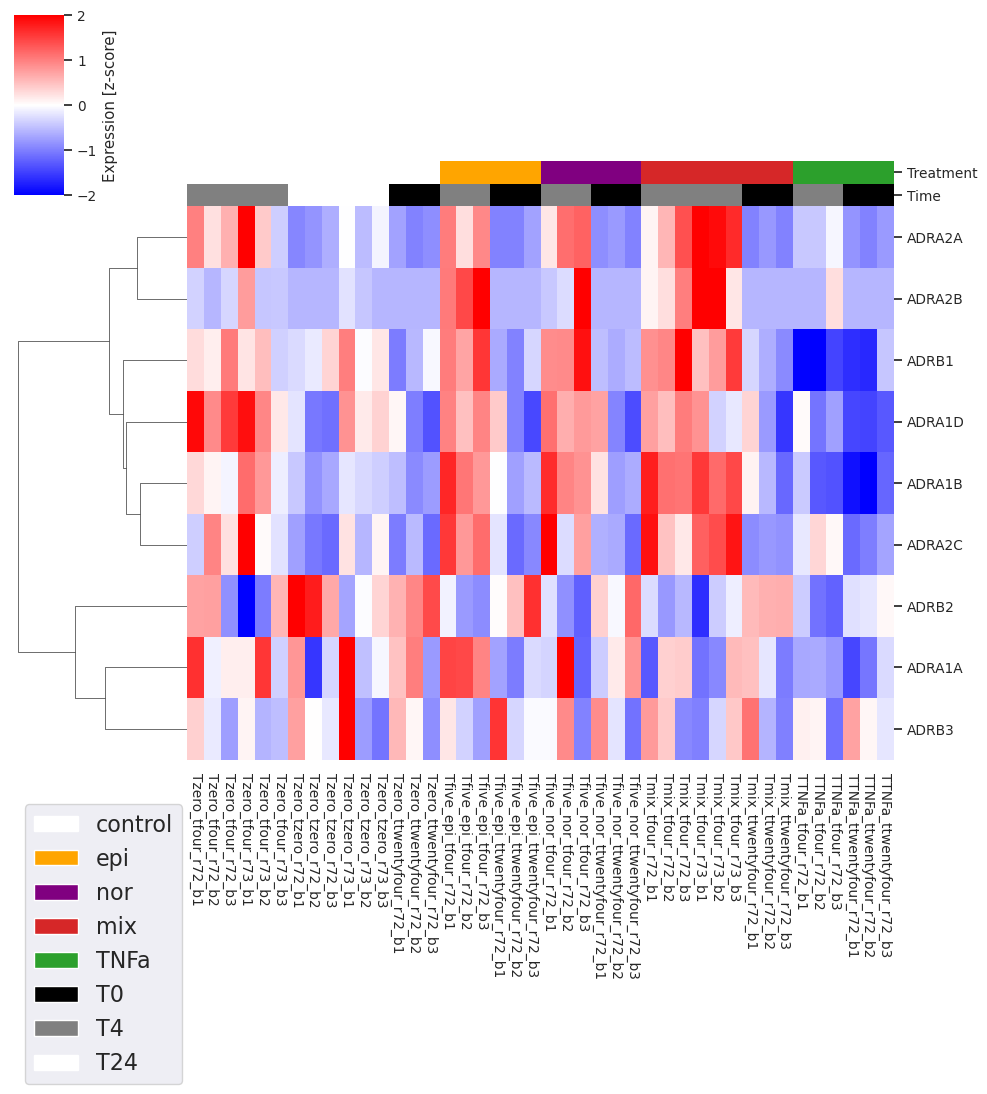

In [13]:
g = seaborn.clustermap(zscore_all, row_cluster=True, col_cluster=False, cmap='bwr', vmin=-2, vmax=2,
                       method='ward', metric='euclidean', xticklabels=1, col_colors=color_df,
                       cbar_kws={'label': 'Expression [z-score]'}
                      )

# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='white', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.patches.Patch(facecolor='0', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='0.5', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='1', edgecolor='white')
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNFa', 'T0', 'T4', 'T24'], fontsize=16, loc=3, bbox_to_anchor=(0, -5))

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=-90)
matplotlib.pyplot.show()

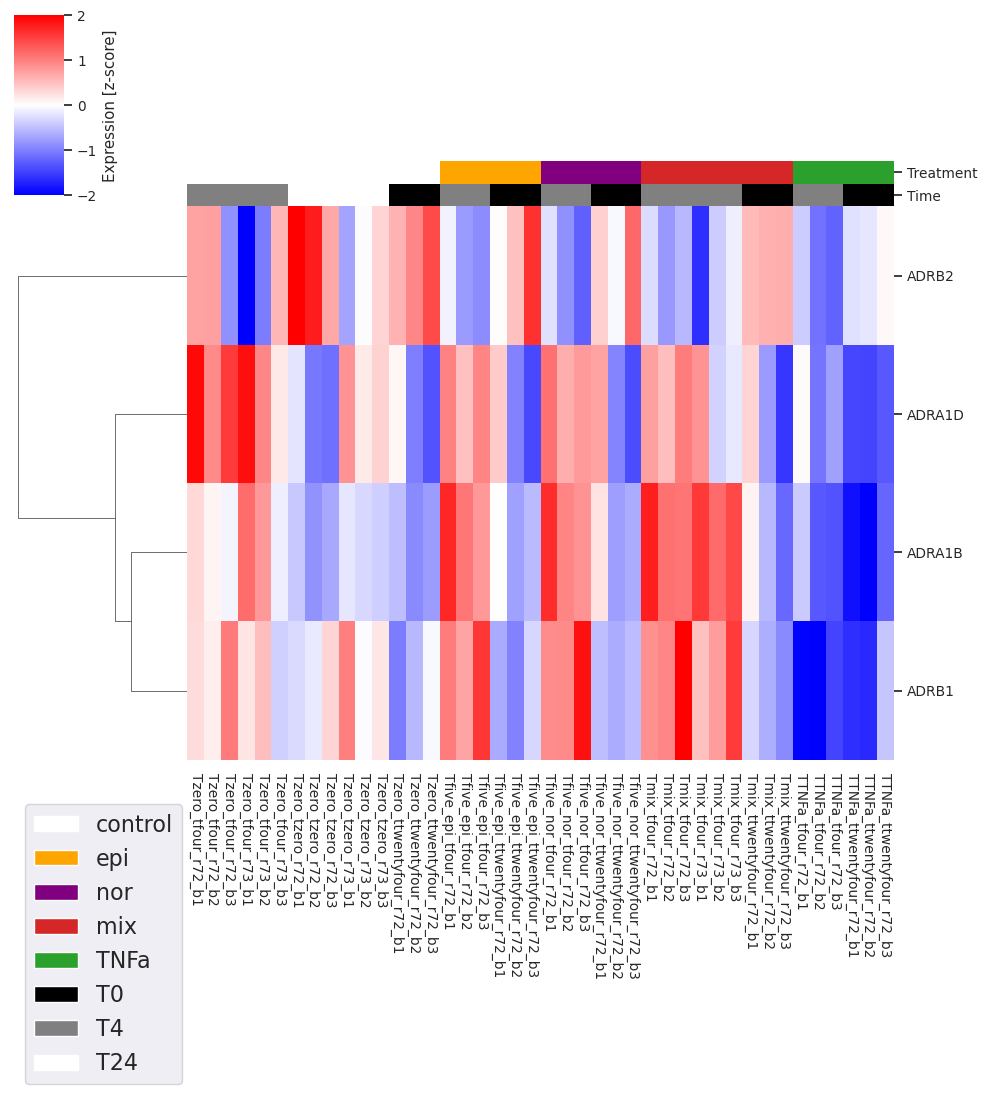

In [14]:
g = seaborn.clustermap(zscore_sub, row_cluster=True, col_cluster=False, cmap='bwr', vmin=-2, vmax=2,
                       method='ward', metric='euclidean', xticklabels=1, col_colors=color_df,
                       cbar_kws={'label': 'Expression [z-score]'}
                      )

# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='white', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.patches.Patch(facecolor='0', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='0.5', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='1', edgecolor='white')
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNFa', 'T0', 'T4', 'T24'], fontsize=16, loc=3, bbox_to_anchor=(0, -5))

# close figure

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=-90)
matplotlib.pyplot.show()